In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import json

In [2]:
# Load json dataset
json_data = open('logins.json')
data = json.load(json_data)

# Define Data Type
type(data)

dict

## Part 1 ‐ Exploratory Data Analysis
logins.json file contains timestamps of user logins in (one) particular geographic location 
1. Aggregate these **login counts** based on **15 minute time intervals**
2. Visualize and describe the resulting time series of login counts
    - Goal: Characterize the patterns of the demand
3. Report/illustrate important features of the demand, such as daily cycles 
4. Report any data quality issues

In [65]:
# Convert dict data to dataframe
login_data_df = pd.DataFrame.from_dict(data)
login_data_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [66]:
login_data_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Observations: 
    1. All years are the same in dataset (1970)
    2. Months range from 1 (January) to 4 (April)
    3. Day stops on 4 (April) 13
    5. Some entries only vary by second of login

In [67]:
# Assess the dataframe
login_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [68]:
# Define the type of objects within the login_time column
login_data_df.login_time.dtype

dtype('O')

dtype('O') is short-hand for 'Python objects'. The entries in both columns need to be converted to Datetime objects in order to visualize and describe the resulting time series of login counts.

#### Convert columns to Datetime objects

In [69]:
# Create a general function that:

#converts a datapoint into a Datetime object
def to_datetime(value):
    return pd.to_datetime(value)

#appends value to list
def add_to_list(li, val):
    return li.append(val)

#converts a list to series
def list_to_series(li):
    return pd.Series(li)

#adds new datetime objects to list
def datetime_to_list(li, date):
    return add_to_list(timestamp, to_datetime(date))

In [70]:
# Test output (1)
value = login_data_df.login_time[0]
to_datetime(value)

Timestamp('1970-01-01 20:13:18')

In [71]:
# Test output
val = 6
li = [1,2,3,4,5]
# (2)
add_to_list(li, val)
# (3)
list_to_series(li)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [72]:
# define empty list
timestamp = []

# add datetime objects to list
for date in login_data_df.login_time:
    datetime_to_list(timestamp, date)

In [74]:
# Test output
#timestamp

In [75]:
# Add datetime values to data_df
login_data_df['timestamp'] = list_to_series(timestamp)

# Drop login_time column
login_data_df = login_data_df.drop(columns='login_time')
login_data_df.head()

,timestamp
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### Aggregate these login counts based on 15 minute time intervals
Step 1: Make timestamp column the login_data_df index

In [76]:
login_data_df.set_index('timestamp', inplace=True)
login_data_df.head()

""
timestamp
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


Step 2: Add a numeric column to track counts (each entry counts as 1)

In [77]:
login_data_df['counts'] = 1
login_data_df.head()

,counts
timestamp,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Step 3: Group entries by 15 minute intervals

In [78]:
login_data_df = login_data_df.resample(rule='15T').sum()
login_data_df.head()

,counts
timestamp,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Step 4: Convert timestamp index back to column

In [79]:
login_data_df = login_data_df.reset_index()
login_data_df.head()

,timestamp,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


### Visualize and describe the resulting time series of login counts
Goal: Characterize the patterns of the demand

In [138]:
# Import necessary modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set(style="darkgrid")

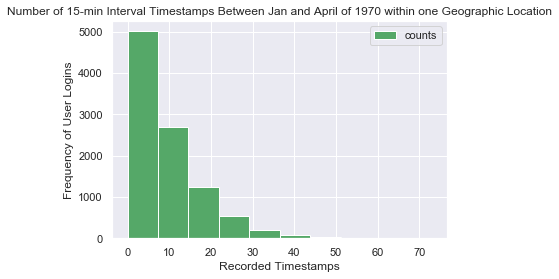

In [120]:
# Basic Visualization of Data
ax = login_data_df.plot(x='timestamp', y='counts', color='g', kind='hist',
                       title="Number of 15-min Interval Timestamps Between Jan and April of 1970 within one Geographic Location")
ax.set_xlabel("Recorded Timestamps")
ax.set_ylabel("Frequency of User Logins")
plt.show()

**Observations:**
    Based on the graph above, it appears that the 'lower' the timestamp, the higher the frequency of user logins. However, what does this truly mean? What can be said about the month, day, and even hour, login-trends of users within this region?

### Report/illustrate important features of the demand, such as daily cycles

In [121]:
# define empty list
time_hour = []
time_day = []
time_month = []

# add datetime objects to list
for date in login_data_df.timestamp:
    
    #define vars
    hour = date.hour
    day = date.day
    month = date.month
    
    #append to lists
    add_to_list(time_hour, hour)
    add_to_list(time_day, day)
    add_to_list(time_month, month)

In [122]:
# Add datetime values to data_df
login_data_df['month'] = list_to_series(time_month)
login_data_df['day'] = list_to_series(time_day)
login_data_df['hour'] = list_to_series(time_hour)
login_data_df.tail()

,timestamp,counts,month,day,hour
9783,1970-04-13 17:45:00,5,4,13,17
9784,1970-04-13 18:00:00,5,4,13,18
9785,1970-04-13 18:15:00,2,4,13,18
9786,1970-04-13 18:30:00,7,4,13,18
9787,1970-04-13 18:45:00,6,4,13,18


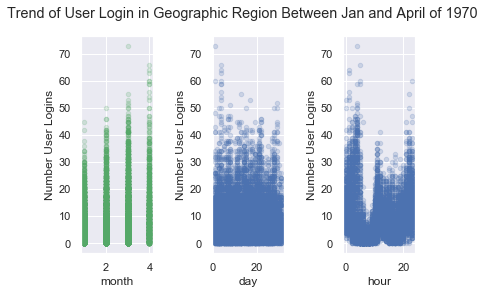

<Figure size 400x1200 with 0 Axes>

In [156]:
# Visualization of Month, Date, and Hour Data
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

# Set common labels
fig.suptitle('Trend of User Login in Geographic Region Between Jan and April of 1970')
ax.set_xlabel('common xlabel')

# Define Month, Day, and Hour subplots
login_data_df.plot(x='month', y='counts', color='g', kind='scatter', ax=ax1, alpha=.2)
login_data_df.plot(x='day', y='counts', color='b', kind='scatter', ax=ax2, alpha=.2)
login_data_df.plot(x='hour', y='counts', color='b', kind='scatter', ax=ax3, alpha=.2)

# Set axis labels
ax1.set_ylabel('Number User Logins')
ax2.set_ylabel('Number User Logins')
ax3.set_ylabel('Number User Logins')

# Adjust layout of subplots
plt.subplots_adjust(wspace=0.8)
figure(num=None, figsize=(2, 6), dpi=200)

plt.show()

**Observations:**
    These three graphs show more information about customer trends than the one previously. Now, it is clear that the number of customer logins *increased* as the months progressed from January to April. In addition, there appear to be marginally more user logins in the beginning of the month than at the end, but there is a consistent stream of (+/-)20 logins throughout the month. This most likely signifies daily users while the varying ranges siginify non-daily users such as weekly or monthly users. Finally, user logins appear to be greatest in the early hours of the day , which appears to be the tail end result of an increase of use from the afternoon to evening. 

-----------------------------------------------

## Part 2 ‐ Experiment and metrics design

**Background**:The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
    1. Weekdays: 
        - Ultimate Gotham is most active at night
        - Ultimate Metropolis is most active during the day 
    2. Weekends: 
        - Reasonable activity in both cities.

**Problem:** A toll bridge, with a two-way toll, between the two cities deter driver partners from crossing city lines. 

**Proposed Solution:** The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### 1. How you will implement the experiment

### 2. What statistical test(s) you will conduct to verify the significance of the observation

### 3. How you would interpret the results and provide recommendations to the city operations team along with any caveats.

-----------------------------------------------

## Part 3 ‐ Predictive Modeling

**Background**: Ultimate is interested in predicting rider retention. To help explore this question, a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014 has been provided (ultimate_data_challenge.json). The data was pulled several months later; consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

**Goal**: Use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. *NOTE: Delete the dataset when you have finished with the challenge.*

#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [3]:
# Load challenge json dataset
challenge_json_data = open('ultimate_data_challenge.json')
challenge_data = json.load(challenge_json_data)
# Define Data Type
type(challenge_data)

list

In [4]:
challenge_data[0], challenge_data[1]

({'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0})

#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).